# Analysis of cell cycle dataset from scEU-seq using methods in storm that do not rely on steady-state

Here you will learn how to analyze different one-shot datasets from scEU-seq using the using methods in storm that do not rely on steady-state and comparing it to Dynamo method.

In [1]:
import warnings

warnings.filterwarnings('ignore')

import dynamo as dyn
import scvelo as scv

## Load and preprocess the data

In [2]:
filename = './data/rpe1.h5ad'
rpe1 = dyn.read(filename)

In [3]:
dyn.convert2float(rpe1, ['Cell_cycle_possition', 'Cell_cycle_relativePos'])

rpe1.obs.exp_type.value_counts()
rpe1[rpe1.obs.exp_type == 'Chase', :].obs.time.value_counts()
rpe1[rpe1.obs.exp_type == 'Pulse', :].obs.time.value_counts()

rpe1_kinetics = rpe1[rpe1.obs.exp_type == 'Pulse', :]
rpe1_kinetics.obs['time'] = rpe1_kinetics.obs['time'].astype(str)
rpe1_kinetics.obs.loc[rpe1_kinetics.obs['time'] == 'dmso', 'time'] = -1
rpe1_kinetics.obs['time'] = rpe1_kinetics.obs['time'].astype(float)
rpe1_kinetics = rpe1_kinetics[rpe1_kinetics.obs.time != -1, :]

rpe1_kinetics.obsm['X_RFP_GFP'] = rpe1_kinetics.obs.loc[:,
                                  ['RFP_log10_corrected', 'GFP_log10_corrected']].values.astype('float')

rpe1_kinetics_dynamo = rpe1_kinetics.copy()
rpe1_kinetics_storm = rpe1_kinetics.copy()
del rpe1_kinetics

In [4]:
# We use highly variable genes and the genes used in method A
cell_dancer_gene = ['KIF20A', 'AURKA', 'MIR100HG', 'PRC1', 'TNIK', 'CCNB1', 'ASF1B', 'KPNA2',
                    'C2orf69', 'NLGN1', 'EPB41', 'KNL1', 'FAM83D', 'MAGI1', 'NUSAP1', 
                    'MTMR6', 'CENPF', 'FKBP5', 'CKS2', 'CKAP2', 'MCTP1', 'RAD21', 'TPX2',
                    'CENPE', 'CCNA2', 'CEP55', 'KIF23', 'RASA1', 'BUB1', 'BRCA1', 'KIF20B',
                    'EFNB2', 'G2E3', 'DLEU2', 'FBXL20', 'HMMR', 'CDCA8', 'NEK2', 'CKAP5', 
                    'NUF2', 'AFF3', 'CIT', 'CDCA2', 'RACGAP1', 'KIF4A', 'RAD51B', 'IMMP2L', 
                    'NCAPG', 'DLGAP5', 'ANLN', 'ASPM', 'MCM10', 'IRS1', 'NCEH1', 'KIF2C', 
                    'NAV2', 'KIF14', 'KIF18A', 'TENM3', 'NGF', 'KIF11', 'PTPRJ', 'SMC4', 
                    'FST', 'PTX3', 'CENPP']

In [5]:
rpe1_kinetics_storm.layers['spliced'] = rpe1_kinetics_storm.layers['su'] + rpe1_kinetics_storm.layers['sl']
rpe1_kinetics_storm.layers['unspliced'] = rpe1_kinetics_storm.layers['uu'] + rpe1_kinetics_storm.layers['ul']

dyn.pp.recipe_monocle(
    rpe1_kinetics_storm,
    tkey="time",
    # experiment_type="one-shot",
    experiment_type="kin",
    n_top_genes=1000,
    # total_layers=False,
    keep_raw_layers=True,
    # feature_selection_layer="new",
    keep_filtered_genes=False,
    genes_to_append=cell_dancer_gene,
)

|-----> recipe_monocle_keep_filtered_cells_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_cells_key=True
|-----> apply Monocole recipe to adata...
|-----> convert ensemble name to official gene name
|-----? Your adata object uses non-official gene names as gene index. 
Dynamo is converting those names to official gene names.
|-----> Storing myGene name info into local cache db: mygene_cache.sqlite.
[ Future queries will be cached in "/home/pqw/pythonProject3/mygene_cache.sqlite" ]
querying 1-1000...done. [ from cache ]
querying 1001-2000...done. [ from cache ]
querying 2001-3000...done. [ from cache ]
querying 3001-4000...done. [ from cache ]
querying 4001-5000...done. [ from cache ]
querying 5001-6000...done. [ from cache ]
querying 6001-7000...done. [ from cache ]
querying 7001-8000...done. [ from cache ]
querying 8001-9000...done. [ from cache ]
querying 9001-10000...done. [ from cache ]
querying 10001-11000...done. [ from cache ]
querying 1100

In [6]:
rpe1_kinetics_dynamo.layers['new'], rpe1_kinetics_dynamo.layers['total'] = rpe1_kinetics_dynamo.layers['ul'] + rpe1_kinetics_dynamo.layers['sl'], \
                                                             rpe1_kinetics_dynamo.layers['su'] + rpe1_kinetics_dynamo.layers['sl'] + \
                                                             rpe1_kinetics_dynamo.layers['uu'] + rpe1_kinetics_dynamo.layers['ul']

del rpe1_kinetics_dynamo.layers['uu'], rpe1_kinetics_dynamo.layers['ul'], rpe1_kinetics_dynamo.layers['su'], rpe1_kinetics_dynamo.layers['sl']

dyn.pp.recipe_monocle(
    rpe1_kinetics_dynamo,
    tkey="time",
    # experiment_type="one-shot",
    experiment_type="kin",
    n_top_genes=1000,
    total_layers=False,
    keep_raw_layers=True,
    # feature_selection_layer="new",
    # keep_filtered_genes=False,
    genes_to_append=cell_dancer_gene,
)

|-----> recipe_monocle_keep_filtered_cells_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_cells_key=True
|-----> recipe_monocle_keep_filtered_genes_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_genes_key=True
|-----> apply Monocole recipe to adata...
|-----> convert ensemble name to official gene name
|-----? Your adata object uses non-official gene names as gene index. 
Dynamo is converting those names to official gene names.
|-----> Storing myGene name info into local cache db: mygene_cache.sqlite.
[ Future queries will be cached in "/home/pqw/pythonProject3/mygene_cache.sqlite" ]
querying 1-1000...done. [ from cache ]
querying 1001-2000...done. [ from cache ]
querying 2001-3000...done. [ from cache ]
querying 3001-4000...done. [ from cache ]
querying 4001-5000...done. [ from cache ]
querying 5001-6000...done. [ from cache ]
querying 6001-7000...done. [ from cache ]
querying 7001-8000...done. [ from cache 

In [7]:
# run scvelo
# scv.pp.filter_and_normalize(rpe1_kinetics_storm, n_top_genes=rpe1_kinetics_storm.n_vars, retain_genes=cell_dancer_gene, enforce=True)
scv.pp.filter_and_normalize(rpe1_kinetics_storm, n_top_genes=rpe1_kinetics_storm.n_vars, retain_genes=cell_dancer_gene, enforce=True, log=False)
scv.pp.moments(rpe1_kinetics_storm, n_pcs=30, n_neighbors=30)
dyn.tl.moments(rpe1_kinetics_storm)
rpe1_kinetics_storm.layers['Mu'] = rpe1_kinetics_storm.layers['M_u']
rpe1_kinetics_storm.layers['Ms'] = rpe1_kinetics_storm.layers['M_s']
scv.tl.recover_dynamics(rpe1_kinetics_storm, var_names='all')

from CSP4ML import select_scv_genes
import numpy as np

# calculate the goodness of fit of the scvelo method and select well-fitting genes
select_scv_genes(rpe1_kinetics_storm)
r2_thr = np.quantile(rpe1_kinetics_storm.var['no_linear_r2'].values, 0.98)

Normalized count data: X, spliced, unspliced.
Extracted 1000 highly variable genes.
computing neighbors


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


    finished (0:00:02) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
|-----> calculating first/second moments...
|-----> [moments calculation] in progress: 100.0000%
|-----> [moments calculation] finished [11.5324s]
recovering dynamics (using 1/12 cores)


  0%|          | 0/1000 [00:00<?, ?gene/s]

    finished (0:03:50) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


select scvelo gene: 1000it [00:00, 2091.46it/s]


In [8]:
# sotrm subdata
rpe1_15min_storm = rpe1_kinetics_storm[rpe1_kinetics_storm.obs.time == 15, :]
rpe1_30min_storm = rpe1_kinetics_storm[rpe1_kinetics_storm.obs.time == 30, :]

rpe1_15min_storm.obs.time = rpe1_15min_storm.obs.time.astype('float')
rpe1_15min_storm.obs.time = rpe1_15min_storm.obs.time / 60  # convert minutes to hours

rpe1_30min_storm.obs.time = rpe1_30min_storm.obs.time.astype('float')
rpe1_30min_storm.obs.time = rpe1_30min_storm.obs.time / 60  # convert minutes to hours

# dynamo subdata
rpe1_15min_dynamo = rpe1_kinetics_dynamo[rpe1_kinetics_dynamo.obs.time == 15, :]
rpe1_30min_dynamo = rpe1_kinetics_dynamo[rpe1_kinetics_dynamo.obs.time == 30, :]

rpe1_15min_dynamo.obs.time = rpe1_15min_dynamo.obs.time.astype('float')
rpe1_15min_dynamo.obs.time = rpe1_15min_dynamo.obs.time / 60  # convert minutes to hours

rpe1_30min_dynamo.obs.time = rpe1_30min_dynamo.obs.time.astype('float')
rpe1_30min_dynamo.obs.time = rpe1_30min_dynamo.obs.time / 60  # convert minutes to hours

del rpe1_kinetics_storm, rpe1_kinetics_dynamo

## Parameter inference and calculation of RNA velocity

In [9]:
# for methods in storm that do not rely on steady-state

# 15 mins
rpe1_15min_storm.uns["pp"]["experiment_type"] = 'kin'
dyn.tl.dynamics(rpe1_15min_storm,
                model="deterministic",
                est_method='osnoss',
                )
dyn.tl.reduceDimension(rpe1_15min_storm, reduction_method='umap')
dyn.tl.cell_velocities(rpe1_15min_storm, enforce=True, vkey='velocity_S', ekey='M_s', basis='RFP_GFP',
                      transition_genes=list(set(rpe1_15min_storm.var_names[rpe1_15min_storm.var['no_linear_r2'] > r2_thr] &
                      set(rpe1_15min_storm.var_names[rpe1_15min_storm.var['gamma_r2'] > 0]))))

# 30 mins
rpe1_30min_storm.uns["pp"]["experiment_type"] = 'kin'
dyn.tl.dynamics(rpe1_30min_storm,
                model="deterministic",
                est_method='osnoss'
                )
dyn.tl.reduceDimension(rpe1_30min_storm, reduction_method='umap')
dyn.tl.cell_velocities(rpe1_30min_storm, enforce=True, vkey='velocity_S', ekey='M_s', basis='RFP_GFP',
                      transition_genes=list(set(rpe1_30min_storm.var_names[rpe1_30min_storm.var['no_linear_r2'] > r2_thr] &
                      set(rpe1_30min_storm.var_names[rpe1_30min_storm.var['gamma_r2'] > 0]))))

|-----> dynamics_del_2nd_moments_key is None. Using default value from DynamoAdataConfig: dynamics_del_2nd_moments_key=False
|-----? You used tkey time (or group None), but you have calculated local smoothing (1st moment) for your data before. Please ensure you used the desired tkey or group when the smoothing was performed. Try setting re_smooth = True if not sure.
|-----> experiment type: kin, method: osnoss, model: deterministic


Estimate gamma via linear regression of t vs. -ln(1-K): 1000it [00:00, 2317.26it/s]
Infer parameters via maximum likelihood estimation based on the ICSP model and scVelo: 1000it [00:01, 789.30it/s]


(1000, 1)
|-----> retrive data for non-linear dimension reduction...
|-----> perform umap...
|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [5.2833s]
|-----? Some row sums(out degree) in adata's neighbor graph are zero.
|-----> Neighbor graph is broken, recomputing....
|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:pca
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected
|-----> <insert> connectivities to obsp in AnnData Object.
|-----> <insert> distances to obsp in AnnData Object.
|-----> <insert> neighbors to uns in AnnData Object.
|-----> <insert> neighbors.indices to uns in AnnData Object.
|-----> <insert> neighbors.params to uns in AnnData Object.
|-----? 
Your data has both labeling / splicing data, please ensuring using the right `basis` ({basis}):
   when using `velo

Estimate gamma via linear regression of t vs. -ln(1-K): 1000it [00:00, 2126.87it/s]
Infer parameters via maximum likelihood estimation based on the ICSP model and scVelo: 1000it [00:01, 925.76it/s]


(1000, 1)
|-----> retrive data for non-linear dimension reduction...
|-----> perform umap...
|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [3.2139s]
|-----? 
Your data has both labeling / splicing data, please ensuring using the right `basis` ({basis}):
   when using `velocity_S`, please use basis based on X_spliced data;
   when using `velocity_T, please use basis based X_total. 
If not sure the data in adata.X, you may need to set `basis='X_spliced_umap'`(`basis='X_total_umap'`) when using `velocity_S` (`velocity_T`). 
|-----> 0 genes are removed because of nan velocity values.
|-----> [calculating transition matrix via pearson kernel with sqrt transform.] in progress: 100.0000%
|-----> [calculating transition matrix via pearson kernel with sqrt transform.] finished [0.2684s]
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%
|-----> [projecting velocity vector to low dimensional

AnnData object with n_obs × n_vars = 574 × 1000
    obs: 'Plate_Id', 'Condition_Id', 'Well_Id', 'RFP_log10_corrected', 'GFP_log10_corrected', 'Cell_cycle_possition', 'Cell_cycle_relativePos', 'exp_type', 'time', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'ul_Size_Factor', 'initial_ul_cell_size', 'uu_Size_Factor', 'initial_uu_cell_size', 'new_Size_Factor', 'initial_new_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'sl_Size_Factor', 'initial_sl_cell_size', 'Size_Factor', 'initial_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'su_Size_Factor', 'initial_su_cell_size', 'total_Size_Factor', 'initial_total_cell_size', 'ntr', 'cell_cycle_phase', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts'
    var: 'Gene_Id', 'query', 'scopes', '_id', '_score', 'symbol', 'notfound', 'nCells', 'nCounts', 'pass_basic_filter', 'log_cv', 'log_m', 'score', 'use_for_pca', 'frac', 'ntr', 'means', 'dispersions', 'dispersions_norm', 'highly

In [10]:
# for Dynamo

# 15 mins
rpe1_15min_dynamo.uns["pp"]["experiment_type"] = 'one-shot'
# rpe1_15min_storm.uns["pp"]["has_splicing"] = False
dyn.tl.dynamics(rpe1_15min_dynamo,
                model="deterministic",
                )
dyn.tl.reduceDimension(rpe1_15min_dynamo, reduction_method='umap')
dyn.tl.cell_velocities(rpe1_15min_dynamo, enforce=True, vkey='velocity_T', ekey='M_t', basis='RFP_GFP')

# 30 mins
rpe1_30min_dynamo.uns["pp"]["experiment_type"] = 'one-shot'
# rpe1_30min_dynamo.uns["pp"]["has_splicing"] = False
dyn.tl.dynamics(rpe1_30min_dynamo,
                model="deterministic",
                )
dyn.tl.reduceDimension(rpe1_30min_dynamo, reduction_method='umap')
dyn.tl.cell_velocities(rpe1_30min_dynamo, enforce=True, vkey='velocity_T', ekey='M_t', basis='RFP_GFP')

|-----> dynamics_del_2nd_moments_key is None. Using default value from DynamoAdataConfig: dynamics_del_2nd_moments_key=False
|-----> calculating first/second moments...
|-----> [moments calculation] in progress: 100.0000%
|-----> [moments calculation] finished [3.1258s]
|-----? Your adata only has labeling data, but `NTR_vel` is set to be `False`. Dynamo will reset it to `True` to enable this analysis.


estimating gamma: 100%|████████████████████| 1000/1000 [00:03<00:00, 261.48it/s]


|-----> retrive data for non-linear dimension reduction...
|-----> perform umap...
|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [2.5922s]
|-----> incomplete neighbor graph info detected: connectivities and distances do not exist in adata.obsp, indices not in adata.uns.neighbors.
|-----> Neighbor graph is broken, recomputing....
|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:pca
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected
|-----> <insert> connectivities to obsp in AnnData Object.
|-----> <insert> distances to obsp in AnnData Object.
|-----> <insert> neighbors to uns in AnnData Object.
|-----> <insert> neighbors.indices to uns in AnnData Object.
|-----> <insert> neighbors.params to uns in AnnData Object.
|-----> 0 genes are removed because of nan velocity values.
|-

estimating gamma: 100%|████████████████████| 1000/1000 [00:04<00:00, 208.93it/s]


|-----> retrive data for non-linear dimension reduction...
|-----> perform umap...
|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [2.9554s]
|-----> incomplete neighbor graph info detected: connectivities and distances do not exist in adata.obsp, indices not in adata.uns.neighbors.
|-----> Neighbor graph is broken, recomputing....
|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:pca
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected
|-----> <insert> connectivities to obsp in AnnData Object.
|-----> <insert> distances to obsp in AnnData Object.
|-----> <insert> neighbors to uns in AnnData Object.
|-----> <insert> neighbors.indices to uns in AnnData Object.
|-----> <insert> neighbors.params to uns in AnnData Object.
|-----> 0 genes are removed because of nan velocity values.
|-

AnnData object with n_obs × n_vars = 574 × 11402
    obs: 'Plate_Id', 'Condition_Id', 'Well_Id', 'RFP_log10_corrected', 'GFP_log10_corrected', 'Cell_cycle_possition', 'Cell_cycle_relativePos', 'exp_type', 'time', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'new_Size_Factor', 'initial_new_cell_size', 'total_Size_Factor', 'initial_total_cell_size', 'Size_Factor', 'initial_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'Gene_Id', 'query', 'scopes', '_id', '_score', 'symbol', 'notfound', 'nCells', 'nCounts', 'pass_basic_filter', 'log_cv', 'log_m', 'score', 'use_for_pca', 'frac', 'ntr', 'alpha', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'beta_k', 'gamma_k', 'use_for_dynamics', 'use_for_transition'
    uns: 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_genes', 'dynamics', 'neighbors', '

## Visualization

Change the settings for better visualization:

In [11]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
sc.set_figure_params(scanpy=True, fontsize=6)
figsize = (6, 4)
dpi = 600
path = './rev_figures/figure3/streamline/'

### Streamline plots in RFP_GFP space

storm:

<Figure size 600x400 with 0 Axes>

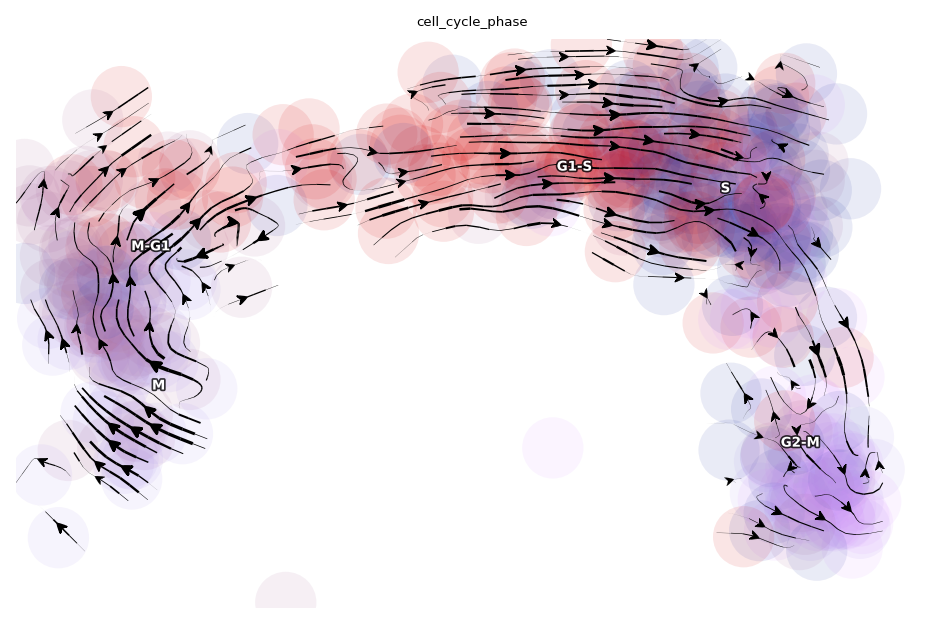

In [12]:
# 15 mins 
dyn.pl.streamline_plot(rpe1_15min_storm, color=['cell_cycle_phase'], basis='RFP_GFP',save_show_or_return='show',
                       save_kwargs={'prefix': 'cell_cycle_rfp_gfp_15mins_storm', 'ext': 'png',
                                    "bbox_inches": None, 'dpi': dpi, 'path': path}, figsize=figsize)

<Figure size 600x400 with 0 Axes>

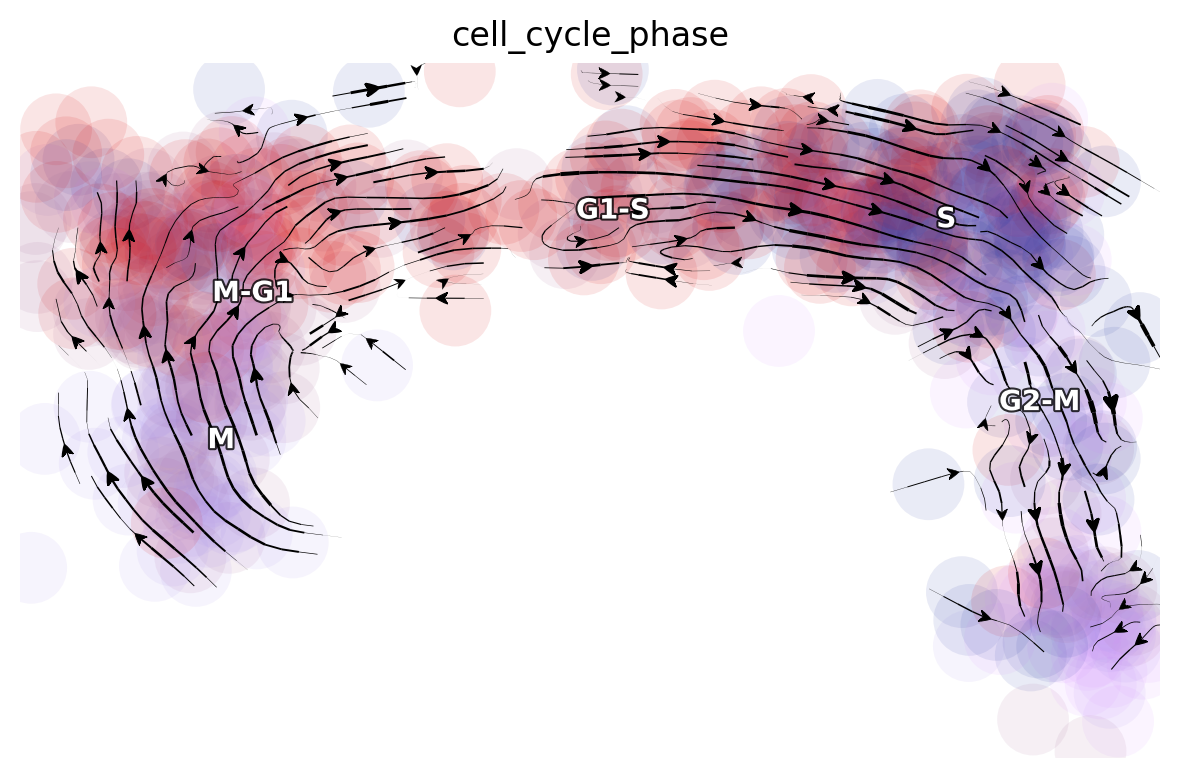

In [13]:
# 30 mins
dyn.pl.streamline_plot(rpe1_30min_storm, color=['cell_cycle_phase'], basis='RFP_GFP',save_show_or_return='show',
                       save_kwargs={'prefix': 'cell_cycle_rfp_gfp_30mins_storm', 'ext': 'png',
                                    "bbox_inches": None, 'dpi': dpi, 'path': path}, figsize=figsize)

dynamo:

<Figure size 600x400 with 0 Axes>

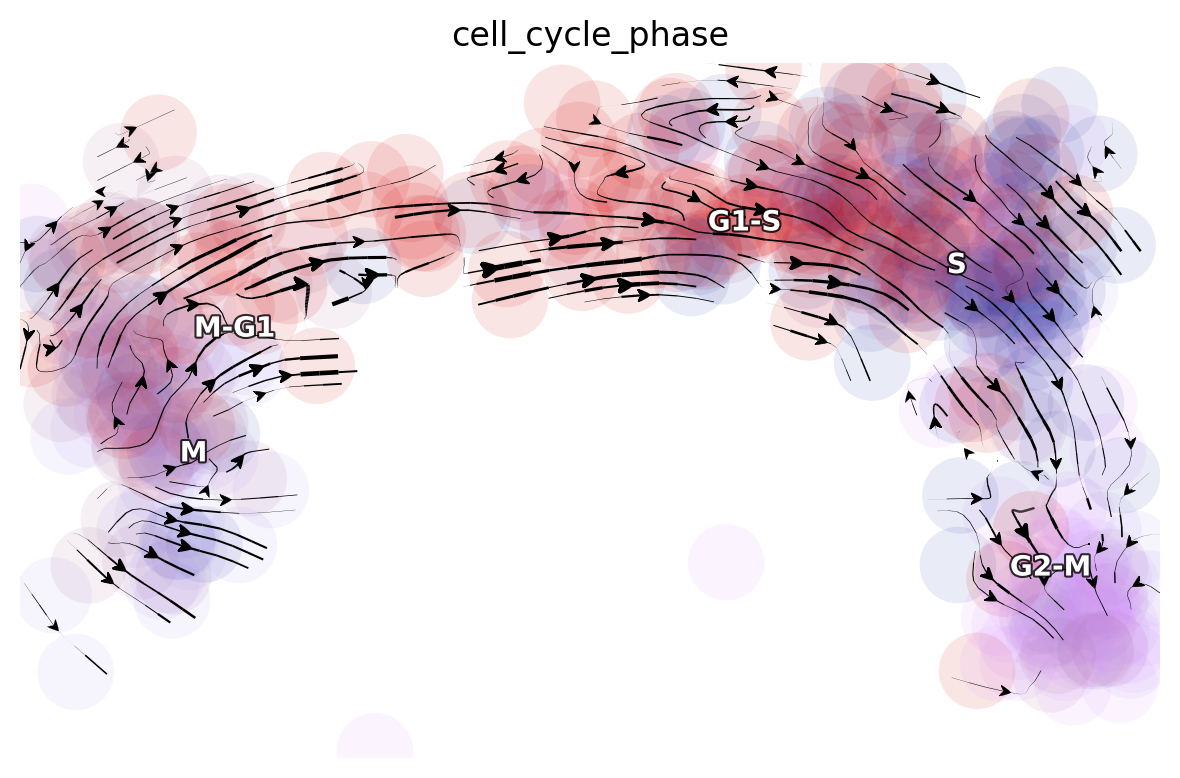

In [14]:
# 15 mins
dyn.pl.streamline_plot(rpe1_15min_dynamo, color=['cell_cycle_phase'], basis='RFP_GFP',save_show_or_return='show',
                       save_kwargs={'prefix': 'cell_cycle_rfp_gfp_15mins_dynamo', 'ext': 'png',
                                    "bbox_inches": None, 'dpi': dpi, 'path': path}, figsize=figsize)

<Figure size 600x400 with 0 Axes>

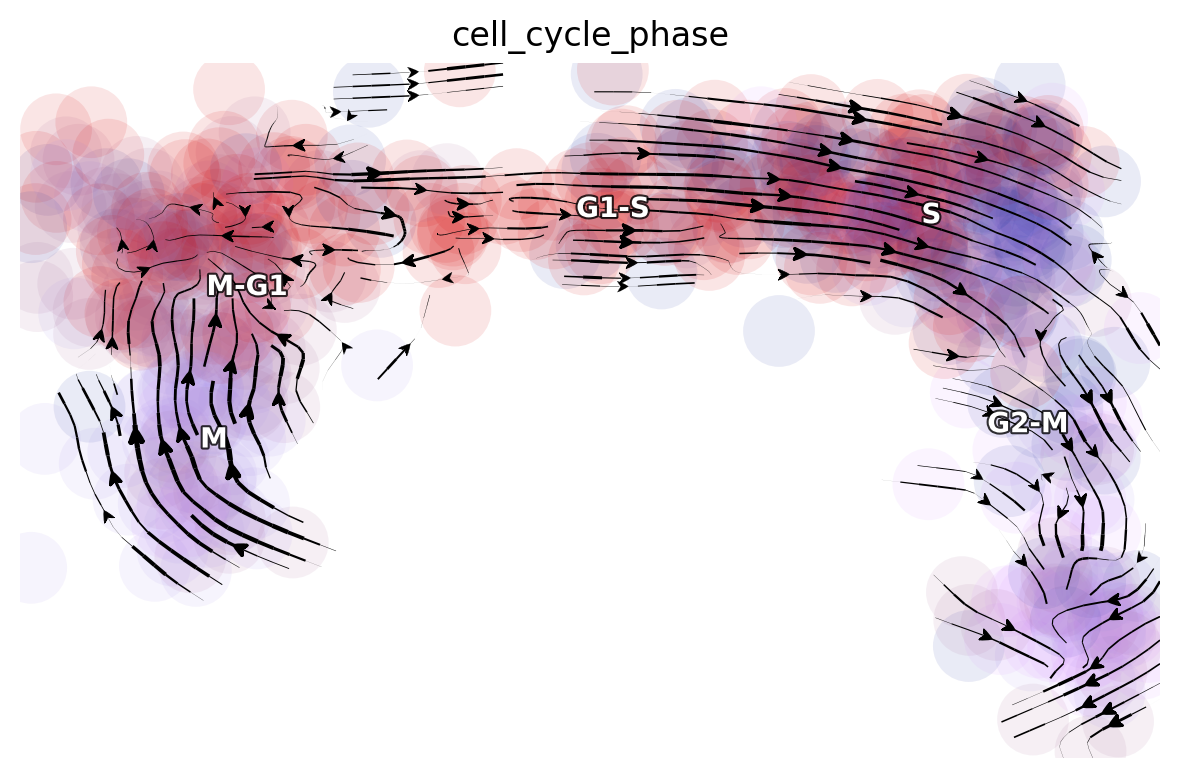

In [15]:
# 30 mins
dyn.pl.streamline_plot(rpe1_30min_dynamo, color=['cell_cycle_phase'], basis='RFP_GFP',save_show_or_return='show',
                       save_kwargs={'prefix': 'cell_cycle_rfp_gfp_30mins_dynamo', 'ext': 'png',
                                    "bbox_inches": None, 'dpi': dpi, 'path': path}, figsize=figsize)

### Plot the inferred results of $\gamma_{t}$ of the two methods in the two sub-datasets

In [16]:
sc.set_figure_params(scanpy=True, fontsize=6)
scatter_size = 10
figsize = (1.61, 1.61)
alpha = 0.3
dpi = 300

In [17]:
gamma_15min_storm = rpe1_15min_storm.var['gamma'].values
gamma_15min_dynamo = rpe1_15min_dynamo.var['gamma'].values
gamma_30min_storm = rpe1_30min_storm.var['gamma'].values
gamma_30min_dynamo = rpe1_30min_dynamo.var['gamma'].values

### Plot the results of $\gamma_t$ inference on different sub-datasets for Dynamo and CSPss respectively

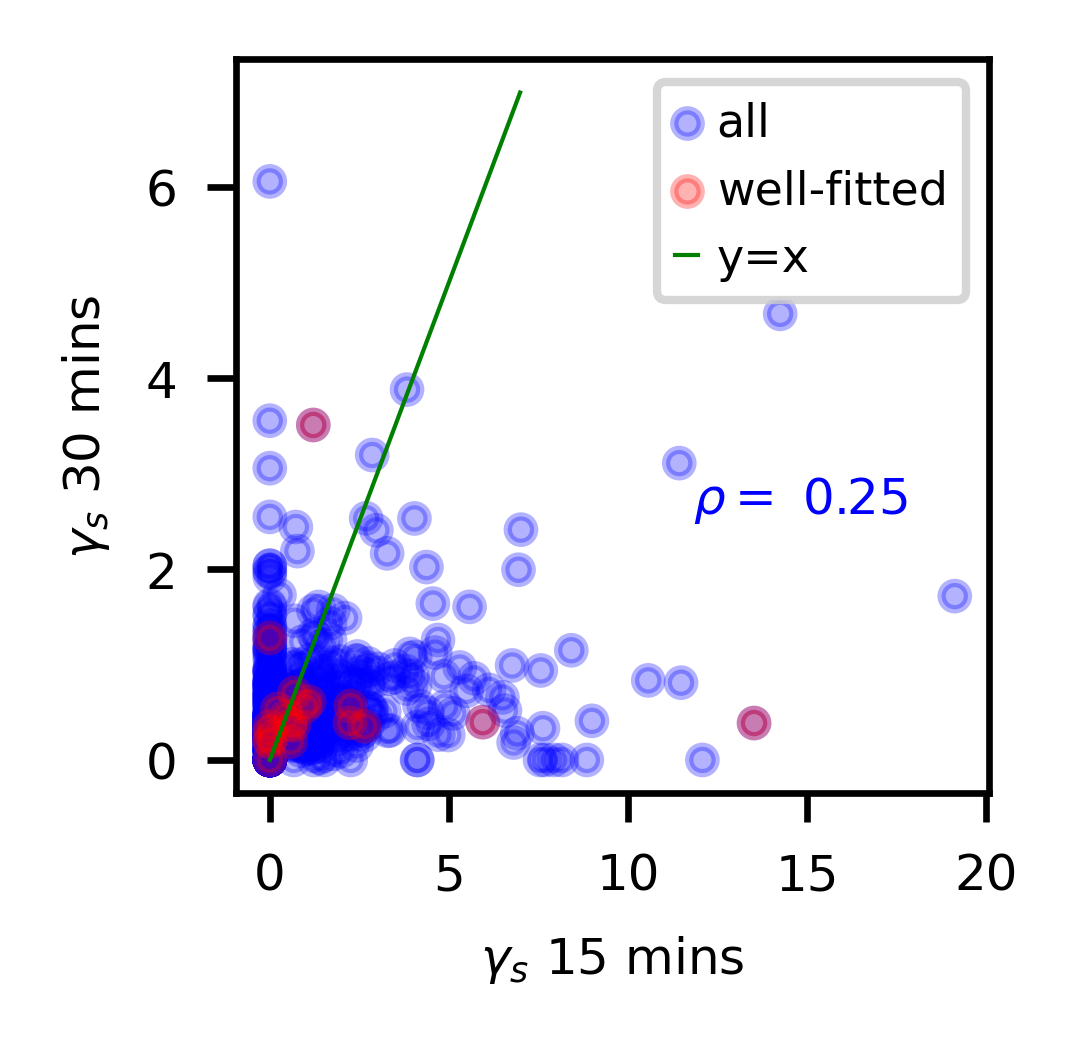

In [18]:
gamma_15min_storm = gamma_15min_storm.astype('float')
gamma_30min_storm = gamma_30min_storm.astype('float')
index_well = rpe1_15min_storm.var['no_linear_r2'] > r2_thr-0.1


range_min = 0
range_max = 7
x = np.arange(range_min, range_max, 0.01)
y = x

index_no_nan = np.logical_and(np.isfinite(gamma_15min_storm), np.isfinite(gamma_30min_storm))
# correlation coefficient between all the genes
rho = np.corrcoef(gamma_15min_storm[index_no_nan], gamma_30min_storm[index_no_nan])
# rho = np.corrcoef(gamma_15min_storm[np.logical_and(index_well,index_no_nan)], gamma_30min_storm[np.logical_and(index_well,index_no_nan)])

fig = plt.figure(1, figsize=figsize, dpi=dpi)
ax = fig.add_subplot(111)
ax.scatter(gamma_15min_storm, gamma_30min_storm, color='blue', s=scatter_size * np.ones(len(gamma_15min_storm)), alpha=alpha, label='all')
ax.scatter(gamma_15min_storm[index_well], gamma_30min_storm[index_well], color='red', s=scatter_size * np.ones(len(gamma_15min_storm[index_well])), alpha=alpha, label='well-fitted')
ax.plot(x, y, color='g', linewidth=0.5, label='y=x')
# plt.text(0.9, 0.75, 'y=x', ha='center', va='center', transform=ax.transAxes, color='g')
plt.text(0.75, 0.4, '$\\rho=$ %4.2f' % rho[0][1], 
         ha='center', va='center', transform=ax.transAxes, color='b')
plt.legend()
# plt.xlim(-0.3,10)
# plt.ylim(-0.3,10)
plt.xlabel('$\gamma_s$ 15 mins')
plt.ylabel('$\gamma_s$ 30 mins')
plt.grid(False)
plt.savefig('./rev_figures/figure3/comp/cell_cycle_storm_diff_time.pdf',dpi=dpi, bbox_inches="tight")
plt.show()

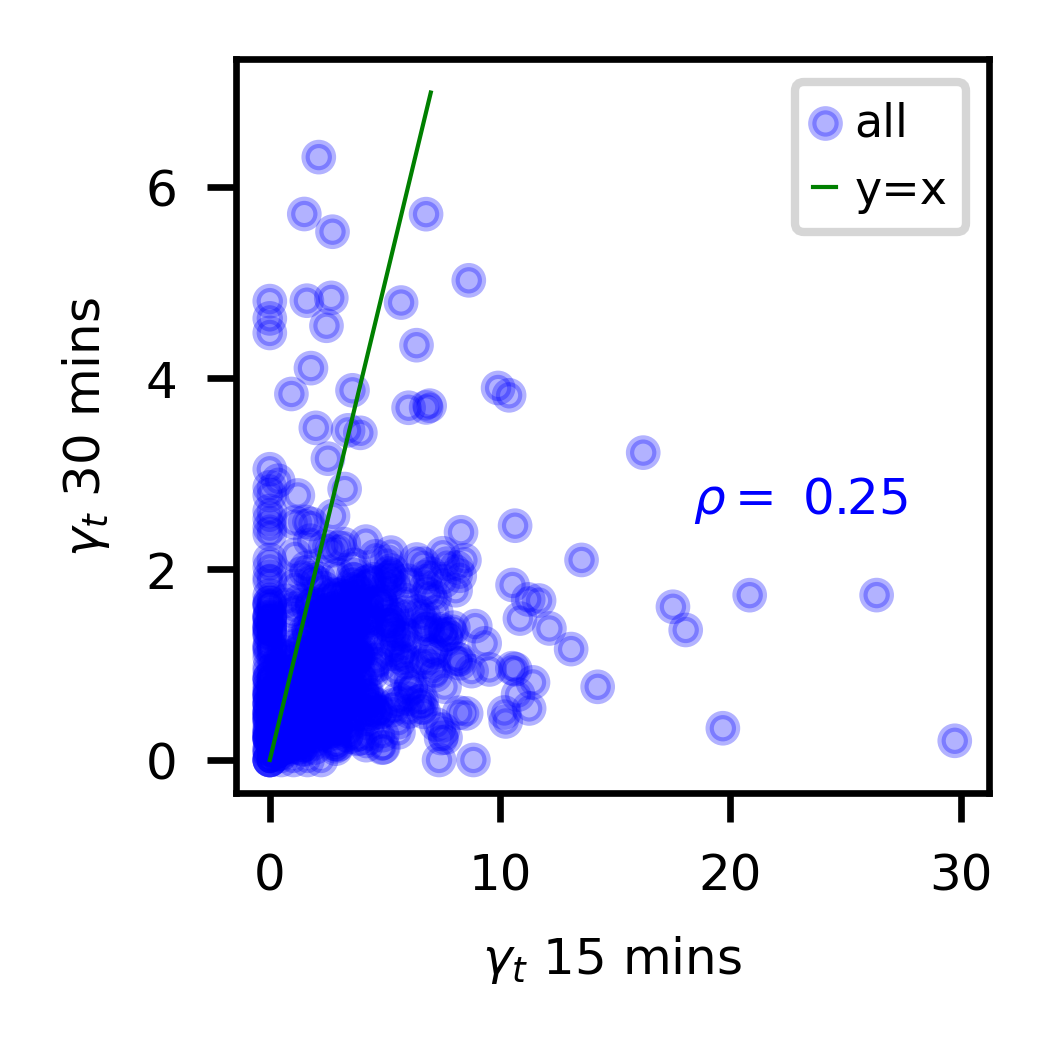

In [19]:
gamma_15min_dynamo = gamma_15min_dynamo.astype('float')
gamma_30min_dynamo = gamma_30min_dynamo.astype('float')

range_min = 0
range_max = 7
x = np.arange(range_min, range_max, 0.01)
y = x

index_no_nan = np.logical_and(np.isfinite(gamma_15min_dynamo), np.isfinite(gamma_30min_dynamo))
# correlation coefficient between all the genes
rho = np.corrcoef(gamma_15min_dynamo[index_no_nan], gamma_30min_dynamo[index_no_nan])


fig = plt.figure(1, figsize=figsize, dpi=dpi)
ax = fig.add_subplot(111)
ax.scatter(gamma_15min_dynamo, gamma_30min_dynamo, color='blue', s=scatter_size * np.ones(len(gamma_15min_dynamo)), alpha=alpha, label='all')
ax.plot(x, y, color='g', linewidth=0.5, label='y=x')
# plt.text(0.9, 0.75, 'y=x', ha='center', va='center', transform=ax.transAxes, color='g')
plt.text(0.75, 0.4, '$\\rho=$ %4.2f' % rho[0][1], 
         ha='center', va='center', transform=ax.transAxes, color='b')
plt.legend()
plt.xlabel('$\gamma_t$ 15 mins')
plt.ylabel('$\gamma_t$ 30 mins')
plt.grid(False)
#plt.savefig('./rev_figures/figure3/comp/cell_cycle_dynamo_diff_time.pdf',dpi=dpi, bbox_inches="tight")
plt.show()